# Primer red neuronal

In [11]:
import numpy as np
import pandas as pd

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
diabetes_train = pd.read_csv('/content/diabetes_train.csv')
diabetes_train

In [ ]:
X = diabetes_train.iloc[ : , 0:8].values
X

In [ ]:
y = diabetes_train.iloc[ : , -1].values
y

# Definir la estructura de la Red Neuronal

In [21]:
model = Sequential()

In [26]:
model.add(Dense(12, input_dim=8, activation='relu'))

In [27]:
model.add(Dense(8, activation= 'relu'))

In [36]:
model.add(Dense(1, activation= 'sigmoid'))

## Modelo de complilación de Red

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Entrenamiento de una Red Neuronal

In [38]:
historial = model.fit(X, y, epochs=1000, batch_size=10)

Epoch 1/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6455 - accuracy: 0.4565
Epoch 2/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6425 - accuracy: 0.4297
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6428 - accuracy: 0.5890
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6426 - accuracy: 0.3588
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6431 - accuracy: 0.4284
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6420 - accuracy: 0.4685
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6421 - accuracy: 0.3133
Epoch 8/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6421 - accuracy: 0.3481
Epoch 9/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6443 - accuracy: 0.3936
Epoch 10/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.6417 - accuracy: 0.3829

## Visualizar la función de perdida

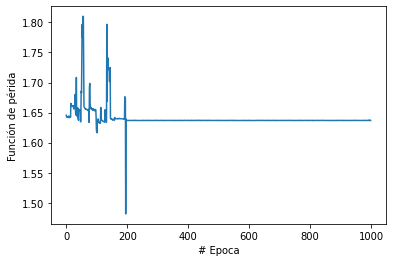

In [39]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Función de périda")
plt.plot(historial.history['loss'])

## Test

In [ ]:
diabetes_test = pd.read_csv('/content/diabetes_test.csv')
diabetes_test

In [ ]:
X_test = diabetes_test.iloc[ : , 0:8].values
X_test

In [42]:
y_test = diabetes_test.iloc[ : , -1].values
y_test

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 203ms/step - loss: 0.7035 - accuracy: 0.5238


[0.7035075426101685, 0.523809552192688]

In [45]:
y_pred = model.predict(X_test)
np.round(y_pred)

1/1 [==============================] - 0s 25ms/step


array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [47]:
resultados = pd.DataFrame(np.round(y_pred), columns=['Predicción'])
resultados['Real'] = pd.Series(y_test)
resultados

,Predicción,Real
0,1.0,0
1,1.0,1
2,0.0,1
3,1.0,1
4,1.0,0
5,1.0,0
6,1.0,1
7,1.0,1
8,1.0,1
9,1.0,0


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
matrix = confusion_matrix(resultados['Real'], resultados['Predicción'])

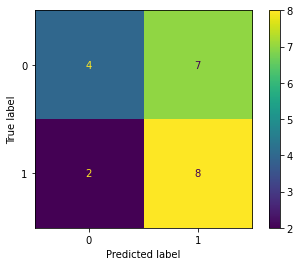

In [56]:
disp = ConfusionMatrixDisplay(matrix)
disp.plot()